In [ ]:
import os
print(os.getcwd())

import sys
sys.path.append('../Utilities/src')
from DA_tools.DA_colors2 import *


import scipy.stats as stats
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from pdf2image import convert_from_path


import matplotlib as mpl
plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi']= 200


/Users/jerzybaranowski/GitHub/KAIR-ISZ/bayes_book/bayes_book/notebooks


# Data analytics

## Exploring distributions

### dr hab. inż. Jerzy Baranowski, Prof. AGH

## Managing expectations

- Main point of probabilistic compoutation is to compute an expectation of certain function of parameters. 

- It generally covers all kind of statistics

- Has many beneficial properties

## Expectations

In general case, function of parameter $q\in Q$: $f(q)$  with respect to a probability distribution (mass function) $\pi(q)$ has expectation given by

$$
\mathbb{E}_{\pi}[f] = \int_{Q}  \, \pi(q) \, f(q) \mathrm{d} q
$$

or in discrete case

$$
\mathbb{E}_{\pi}[f] = \sum_{q \in Q} \pi(q) \, f(q).
$$

## How to compute expectations?

Analytic integration is practically impossible. 

We are left with quadratures, for ex. Euler
$$
\mathbb{E}_{\pi}[f] \approx 
\sum_{n = 1}^{N} (\Delta q)_{n} \, \pi(q_{n}) \, f(q_{n}).
$$


## How to compute expectations?

Other option is exact sampling, leading to so called Monte Carlo estimators.

If we can generate set of samples $\{ q_{1}, \ldots, q_{N} \} \in Q$, such that

$$\hat{f}_{N}^{\text{MC}} = \frac{1}{N} \sum_{n = 1}^{N} f(q_{n}),$$

asymptotically converges

$$
\lim_{N \rightarrow \infty} \hat{f}_{N}^{\text{MC}} = \mathbb{E}_{\pi}[f].
$$

Then we have an exact sampling procedure


## Monte Carlo estimators

Provided, that samples are generated properly we can quantify estimator error

$$
\frac{ \hat{f}_{N}^{\text{MC}} - \mathbb{E}_{\pi}[f] }
{\text{MC-SE}_{N}[f] } 
\sim \mathcal{N}(0, 1),
$$

With Monte Carlo Standard Error given by
$$
\text{MC-SE}_{N}[f] 
= \sqrt{ \frac{ \text{Var}_{\pi}[f]}{N} }.
$$

## Motivational example
- We return to Mass Effect experiment using grid approximation


<img src="img/masseffect.png" alt="drawing" width="500"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; EA &amp; Bioware </div>


## Grid approximation
1. Define the grid. This means you decide how many points to use in estimating the posterior, and then you make a list of the parameter values on the grid.
2. Compute the value of the prior at each parameter value on the grid.
3. Compute the likelihood at each parameter value.
4. Compute the unstandardized posterior at each parameter value, by multiplying the prior by the likelihood.
5. Finally, standardize the posterior, by dividing each value by the sum of all values.

In [ ]:
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
   
    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [ ]:
posterior_grid_approx()

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 array([0.        , 0.02129338, 0.40378549, 0.57492114, 0.        ]))

## Grid approximation example

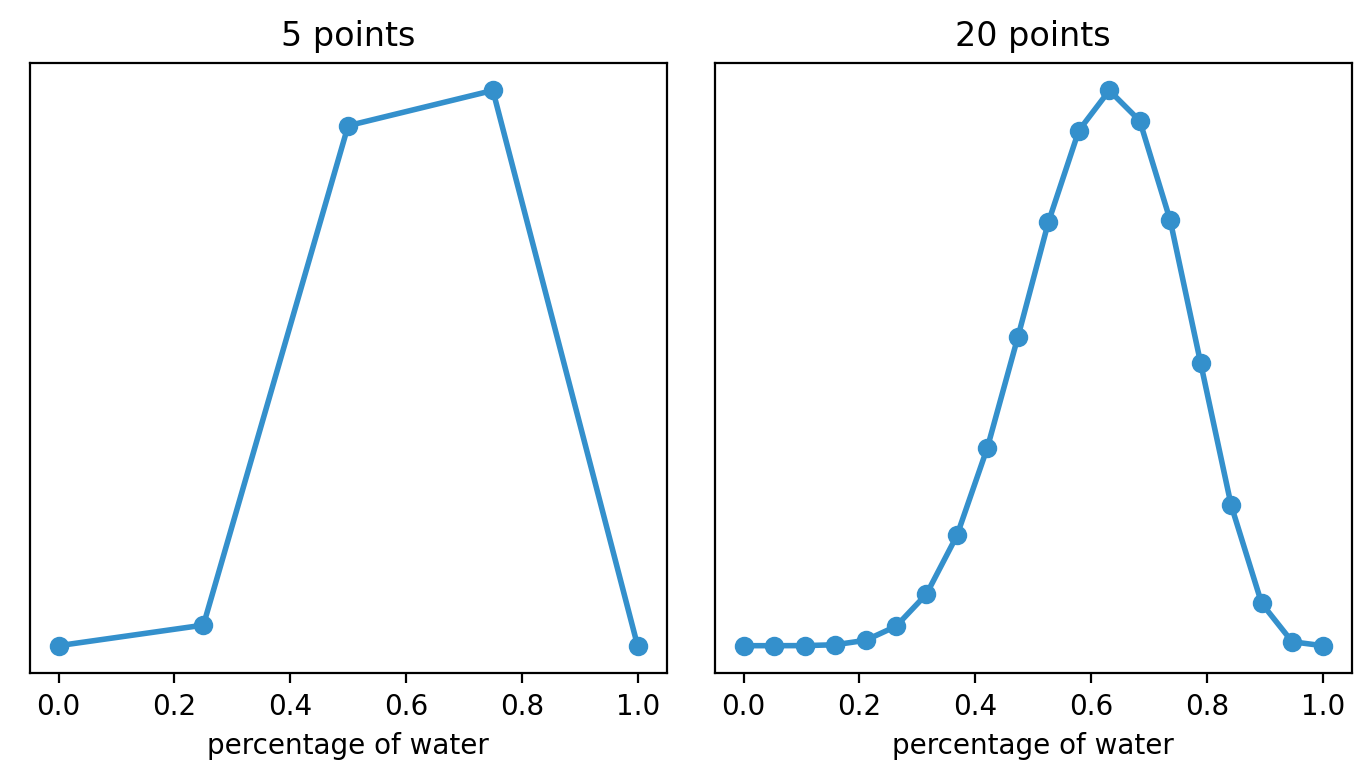

In [ ]:
f3, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(7,4),tight_layout=True)
grid5=posterior_grid_approx()
grid20=posterior_grid_approx(20)
ax1.plot(grid5[0],grid5[1],marker='o',color=MID_HIGHLIGHT,linewidth=2 )
ax1.set_title('5 points')
ax1.set_xlabel('percentage of water')
#ax1.set_ylabel('posterior probability')
ax1.set_yticks([])
ax2.plot(grid20[0],grid20[1],marker='o',color=MID_HIGHLIGHT,linewidth=2)
ax2.set_title('20 points')
ax2.set_xlabel('percentage of water')
ax2.set_yticks([])
plt.show()
f3.savefig('../markdown/img/grid_approximation.png')


## Summarizing by sampling
- The easiest way to get information about even complicated posteriors is to simulate data that correspond to it and get parameter estimates from sampling.
- For single parameter problems the easiest way is to use inverse cumulative distribution function 
- Grid approximation is more universal

In [ ]:
def posterior_grid_approx(grid_points=5, success=7, tosses=11,prior_sel=1):
    
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    if prior_sel==1:
        prior = np.repeat(5, grid_points)  # uniform
    elif prior_sel==2:
        prior = (p_grid >= 0.5).astype(int)  # truncated
    elif prior_sel==3:    
        prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp 
    else:
        raise ValueError('Unsuported prior selection')
    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

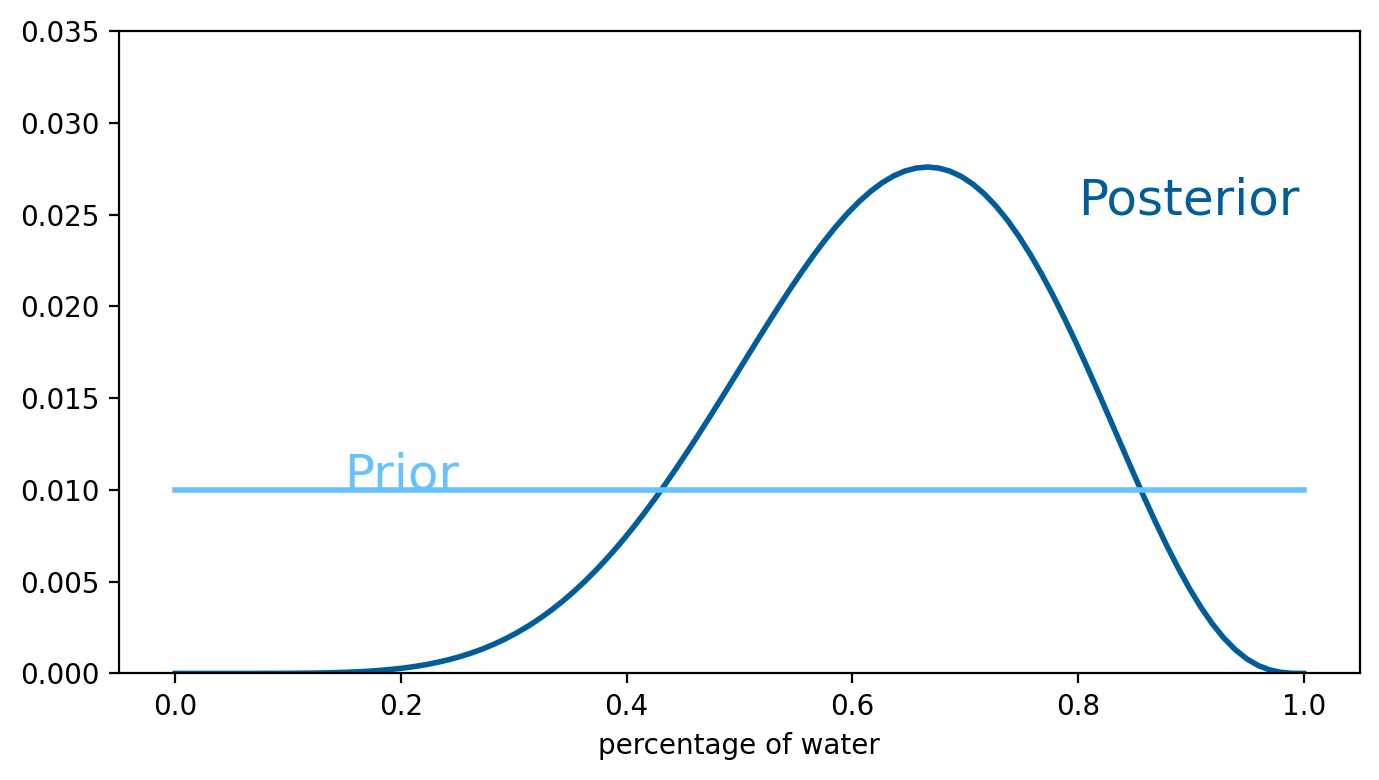

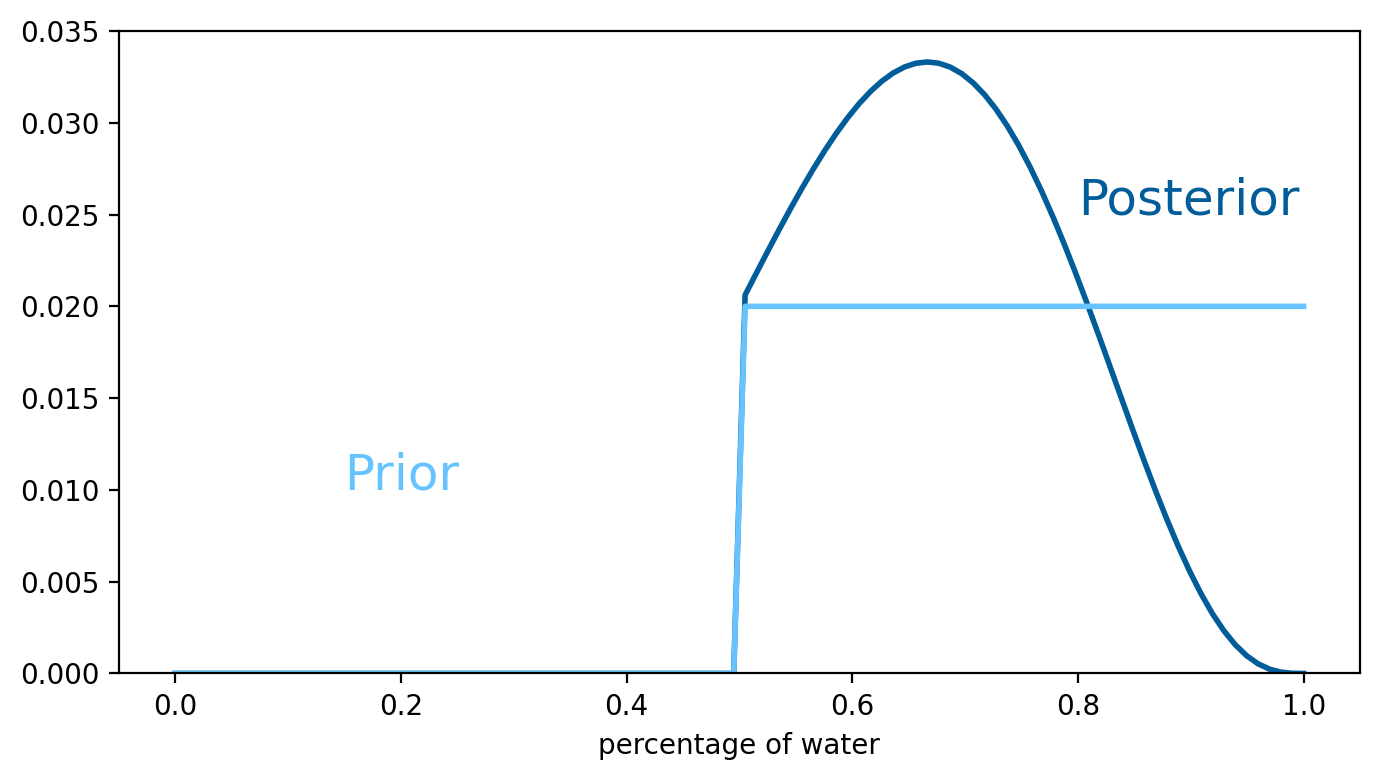

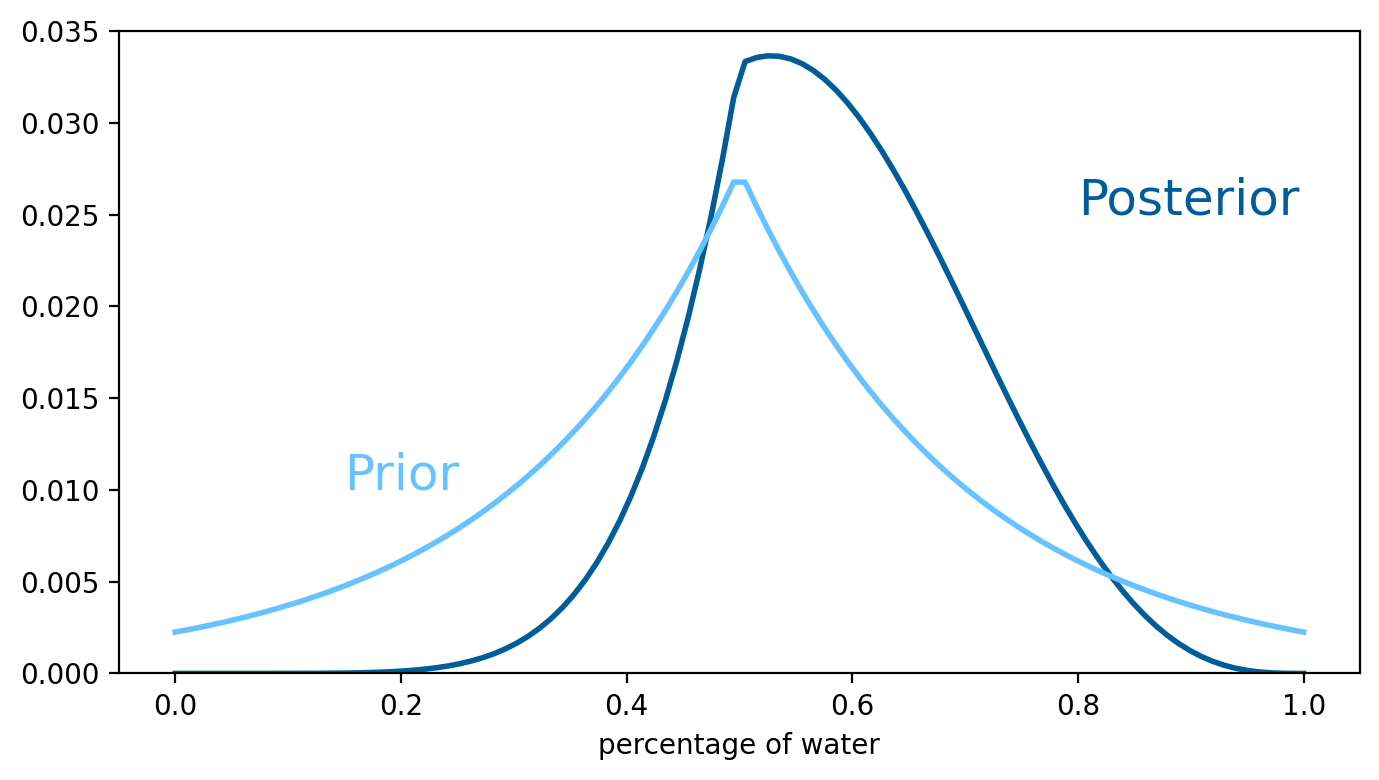

In [ ]:


for k in range(3):
    p_grid, posterior=posterior_grid_approx(100,6,9,prior_sel=k+1)
    p_grid, prior=posterior_grid_approx(100,0,0,prior_sel=k+1)
    fig,ax = plt.subplots(1, 1, figsize=(7,4),tight_layout=True)
    ax.plot(p_grid, posterior,color=DARK,linewidth=2)
    ax.plot(p_grid, prior,color=MID,linewidth=2)
    ax.text(0.15,.01,'Prior',c=MID,size=18) 
    ax.text(0.8,.025,'Posterior',c=DARK,size=18) 
    ax.set_xlabel('percentage of water')
    ax.set_ylim(0,0.035)
#ax.set_ylabel(' probability')
#ax.set_yticks([])
plt.show()

## Sampling from grid posterior

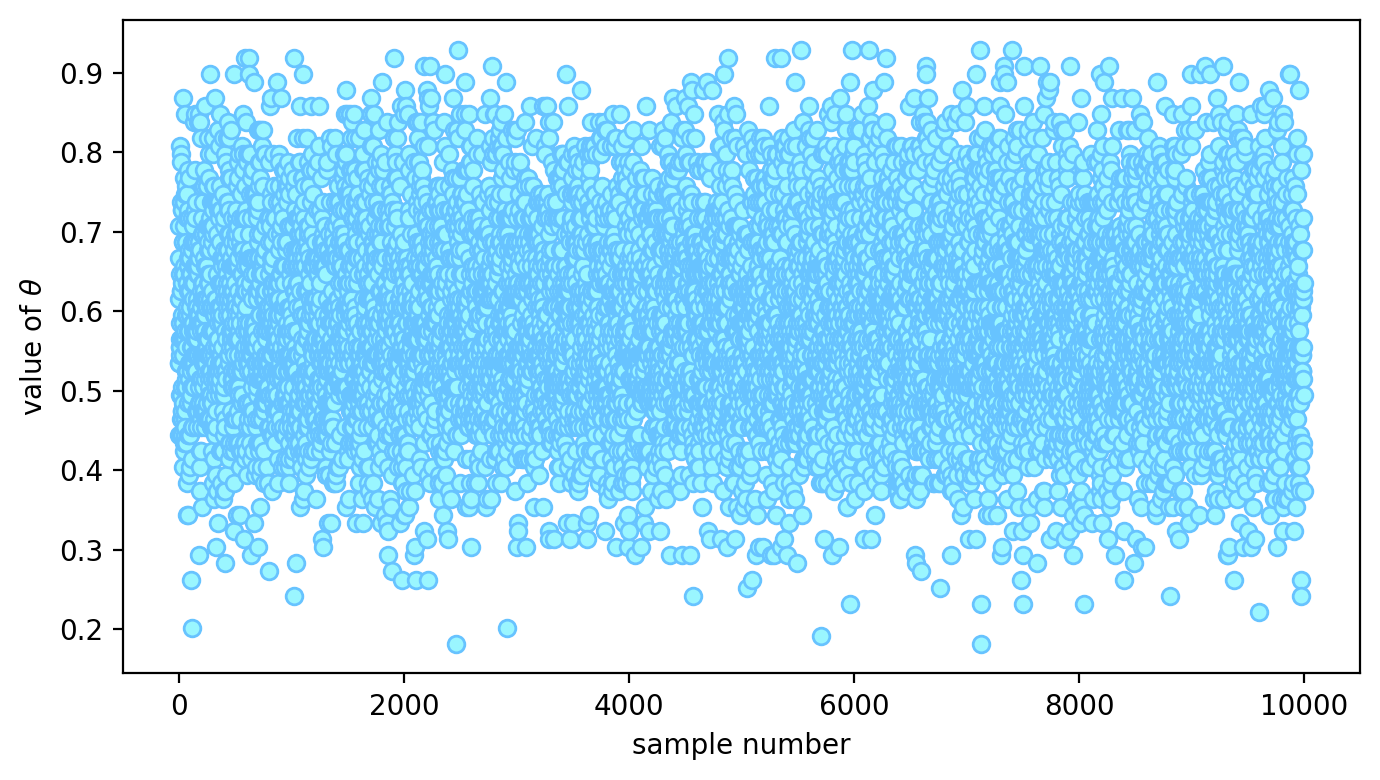

In [ ]:
np.random.seed(44)
samples=np.random.choice(p_grid,size=10000,replace=True,p=posterior)

fig,ax = plt.subplots(1, 1, figsize=(7,4),tight_layout=True)
ax.scatter(range(10000),samples,color=LIGHT_HIGHLIGHT,edgecolor=MID)
ax.set_xlabel('sample number')
ax.set_ylabel(r'value of $\theta$')
plt.show()


## Weakly informative priors
We characterize a prior distribution as weakly informative if it is proper but is set up so that the information it does provide is intentionally weaker than whatever actual prior knowledge is available. 
- Make uninformative more complicated
- Make informative less complicated

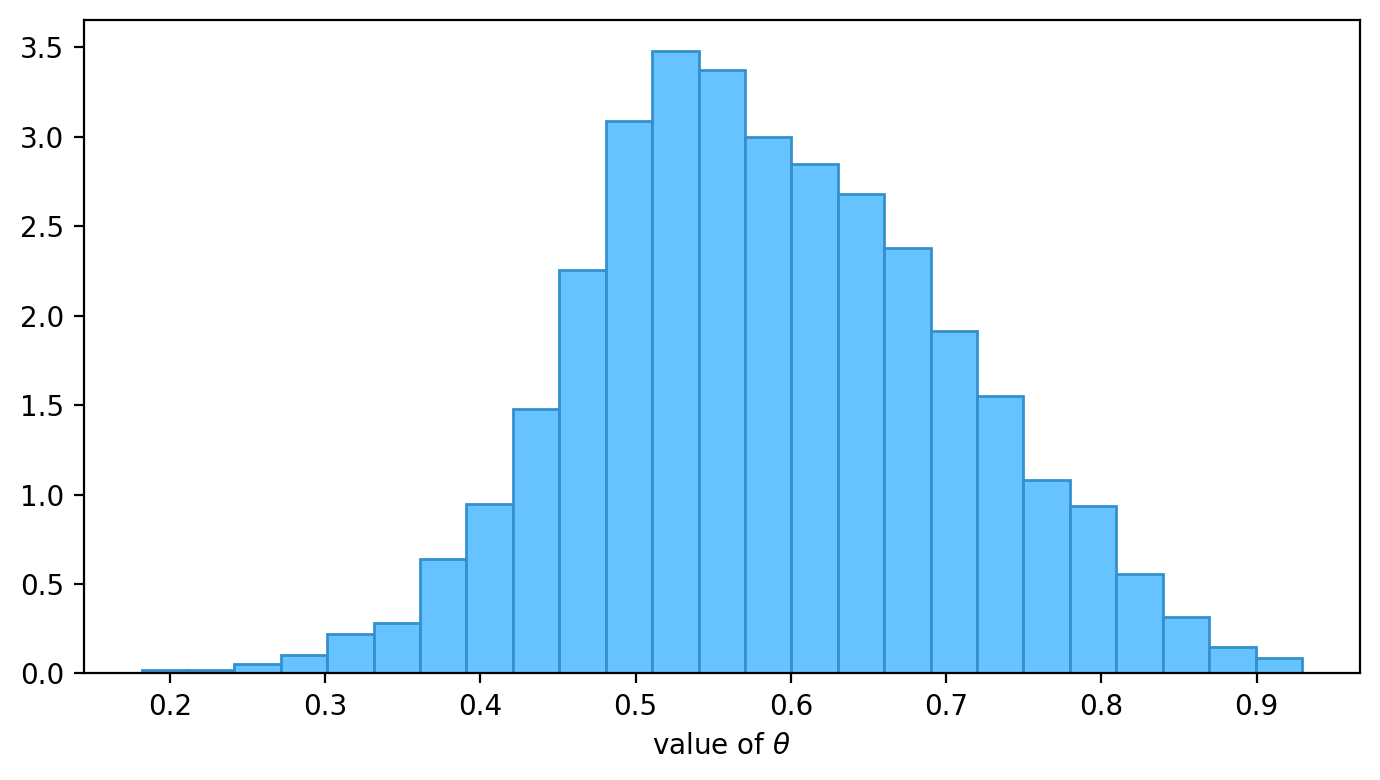

In [ ]:
fig,ax = plt.subplots(1, 1, figsize=(7,4),tight_layout=True)
ax.hist(samples,bins=25,density=True,color=MID,edgecolor=MID_HIGHLIGHT)
ax.set_xlabel(r'value of $\theta$')
plt.show()

In [ ]:
# posterior probability where p < 0.5
print(np.sum( posterior[ p_grid < 0.5 ] ))

0.24107415057429224


In [ ]:
# same by sampling
print(np.sum( samples < 0.5 ) / 1e4)

0.2371


In [ ]:
# intervals of interest
print(np.sum( (samples > 0.5) & (samples < 0.75) ) / 1e4)

0.6694


In [ ]:
# quantiles
np.quantile(samples, [0.1,0.9])

array([0.44444444, 0.74747475])

## Prior predictive distribution

In [ ]:
pr_samples=np.random.choice(p_grid,size=10000,replace=True,p=prior)
pr_pr_d_samples=np.random.binomial(1,pr_samples)

print('Mean rate of success = {}'.format(np.sum(pr_pr_d_samples)/1e4))



Mean rate of success = 0.5017


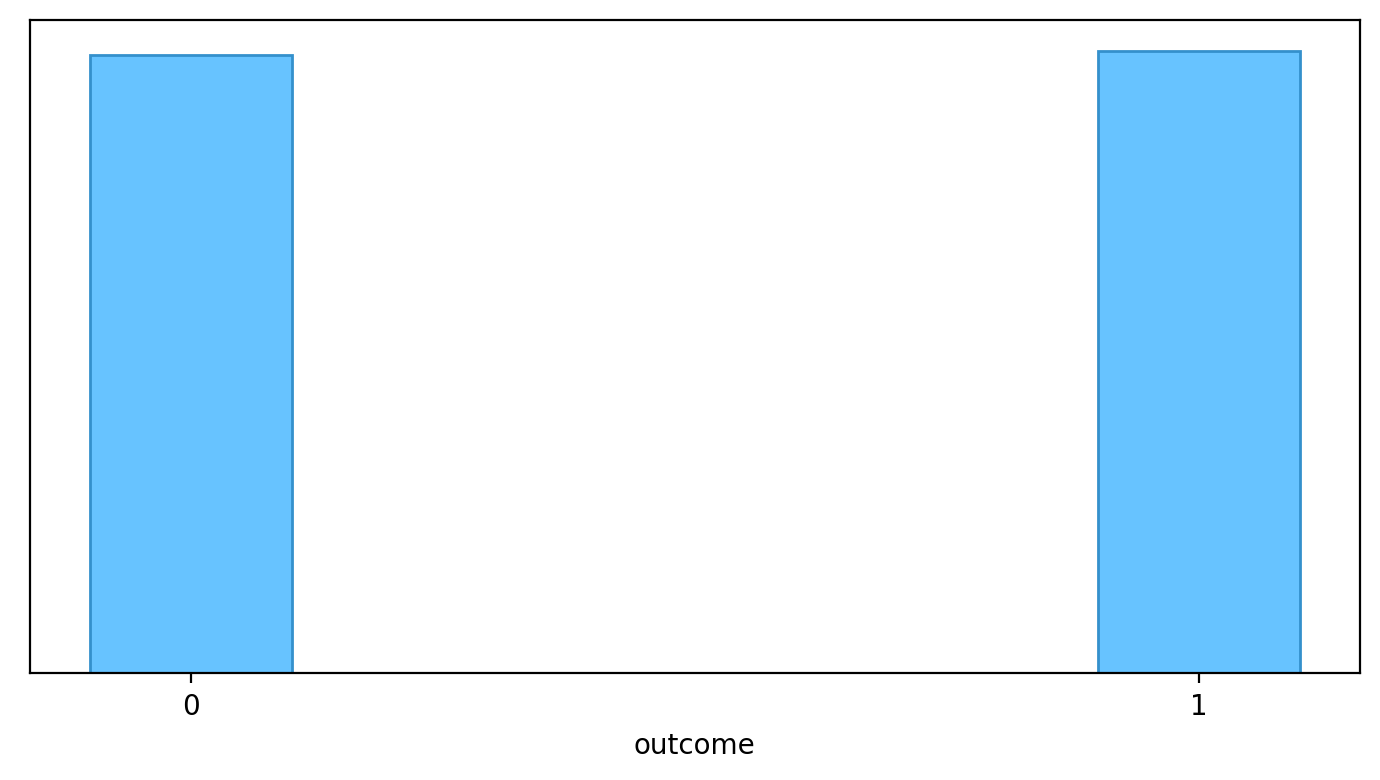

In [ ]:
fig,ax = plt.subplots(1, 1, figsize=(7,4),tight_layout=True)
ax.hist(pr_pr_d_samples,bins=[-.1,.1,.9,1.1],density=True,color=MID,edgecolor=MID_HIGHLIGHT)
ax.set_xlabel('outcome')
ax.set_xticks([0,1])
ax.set_yticks([])
plt.show()

## Posterior predictive distribution

In [ ]:
post_samples=np.random.choice(p_grid,size=10000,replace=True,p=posterior)
post_pr_d_samples=np.random.binomial(1,post_samples)
print('Mean rate of success = {}'.format(np.sum(post_pr_d_samples)/1e4))


Mean rate of success = 0.5813


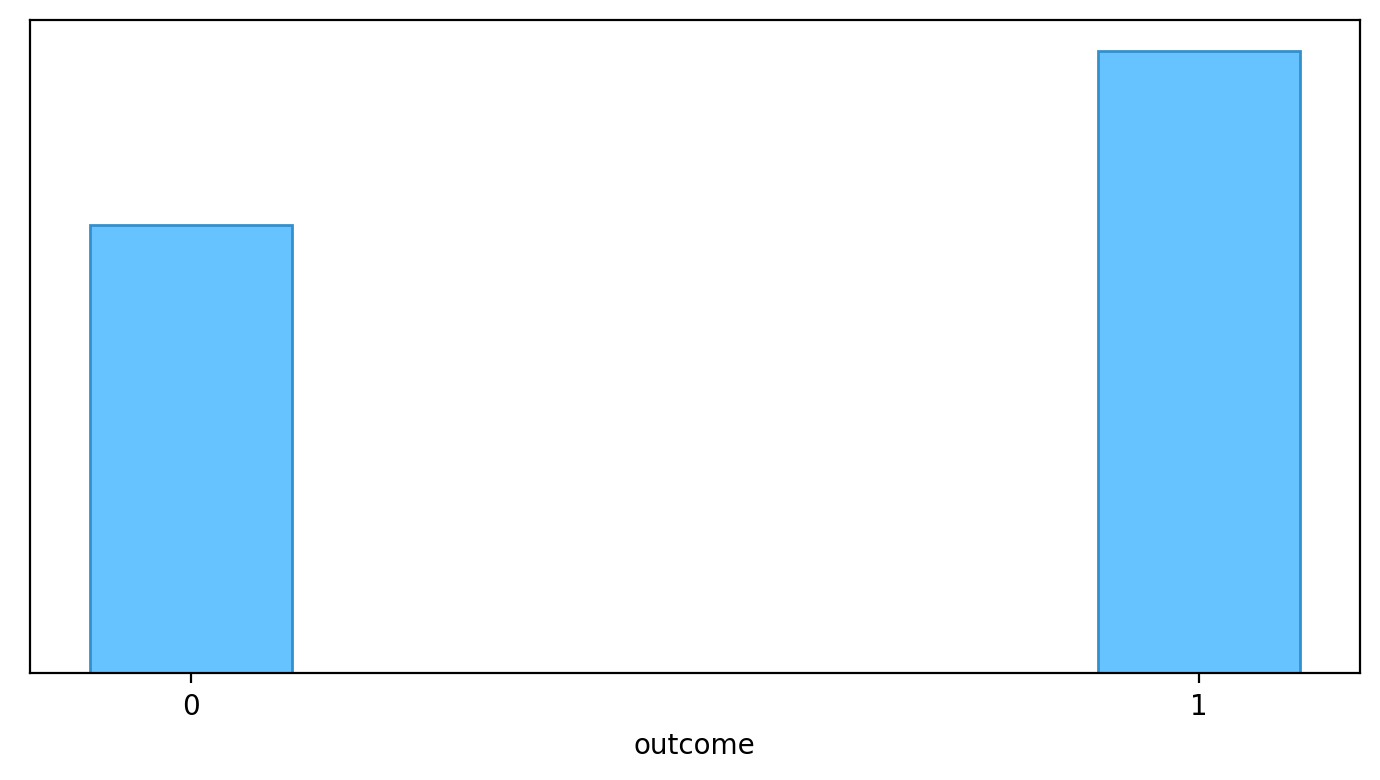

In [ ]:
fig,ax = plt.subplots(1, 1, figsize=(7,4),tight_layout=True)
ax.hist(post_pr_d_samples,bins=[-.1,.1,.9,1.1],density=True,color=MID,edgecolor=MID_HIGHLIGHT)
ax.set_xlabel('outcome')
ax.set_xticks([0,1])
ax.set_yticks([])
plt.show()


In [ ]:
post_pr_d_samples

array([1, 0, 1, ..., 0, 1, 1])

## Do grid approximations generalize?
It depends

<img src="img/grid_density.png" alt="drawing" width="500"/> 

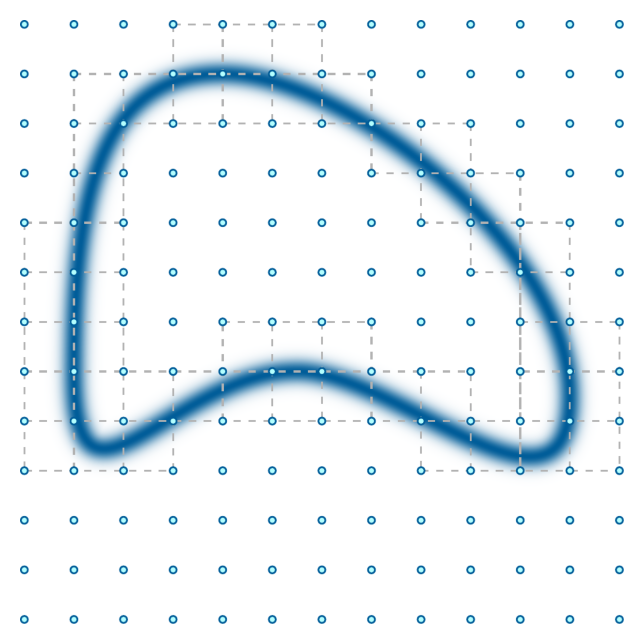

In [ ]:
input_file = '2d_grid.pdf'
pic_grid = convert_from_path('../tikz/'+input_file,dpi=300)
output_folder='../markdown/img/'
output_file=input_file.replace('.pdf','.png')
pic_grid[0].save(output_folder+output_file, 'PNG')
plt.imshow(pic_grid[0])
plt.axis('off')

plt.show()

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Sometimes geometry is difficult

<img src="img/grid_negligible.png" alt="drawing" width="500"/>


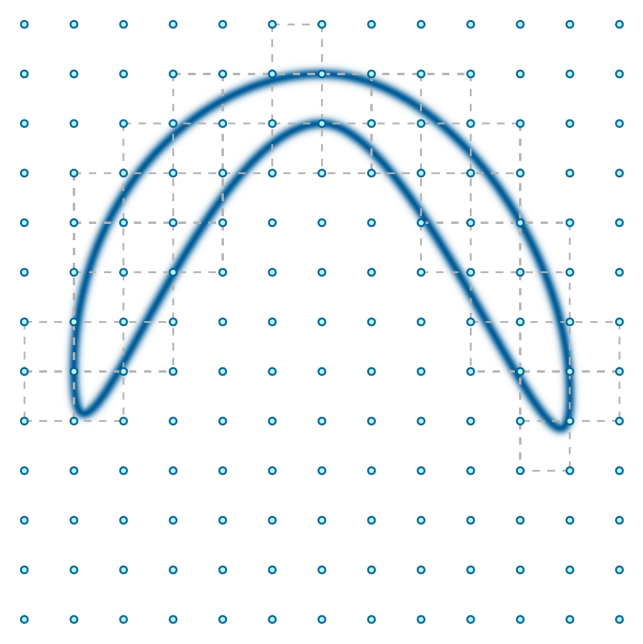

In [ ]:
input_file = '2d_grid_finer.pdf'
pic_grid = convert_from_path('../tikz/'+input_file,dpi=300)
output_folder='../markdown/img/'
output_file=input_file.replace('.pdf','.png')
pic_grid[0].save(output_folder+output_file, 'PNG')
plt.imshow(pic_grid[0])
plt.axis('off')

plt.show()

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## What contributes to expectation?
Expectation is an integral

$$
\mathbb{E}_{\pi}[f] = \int_{Q} \mathrm{d} q \, \pi(q) \, f(q).
$$

Intuitively, wherever distribution $\pi(q)$ is large, it should contribute the most, in particular next to maximum (mode).

<img src="img/conc_of_meas_anal_1.png" alt="drawing" width="400"/>


<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


NameError: name 'loggamma' is not defined

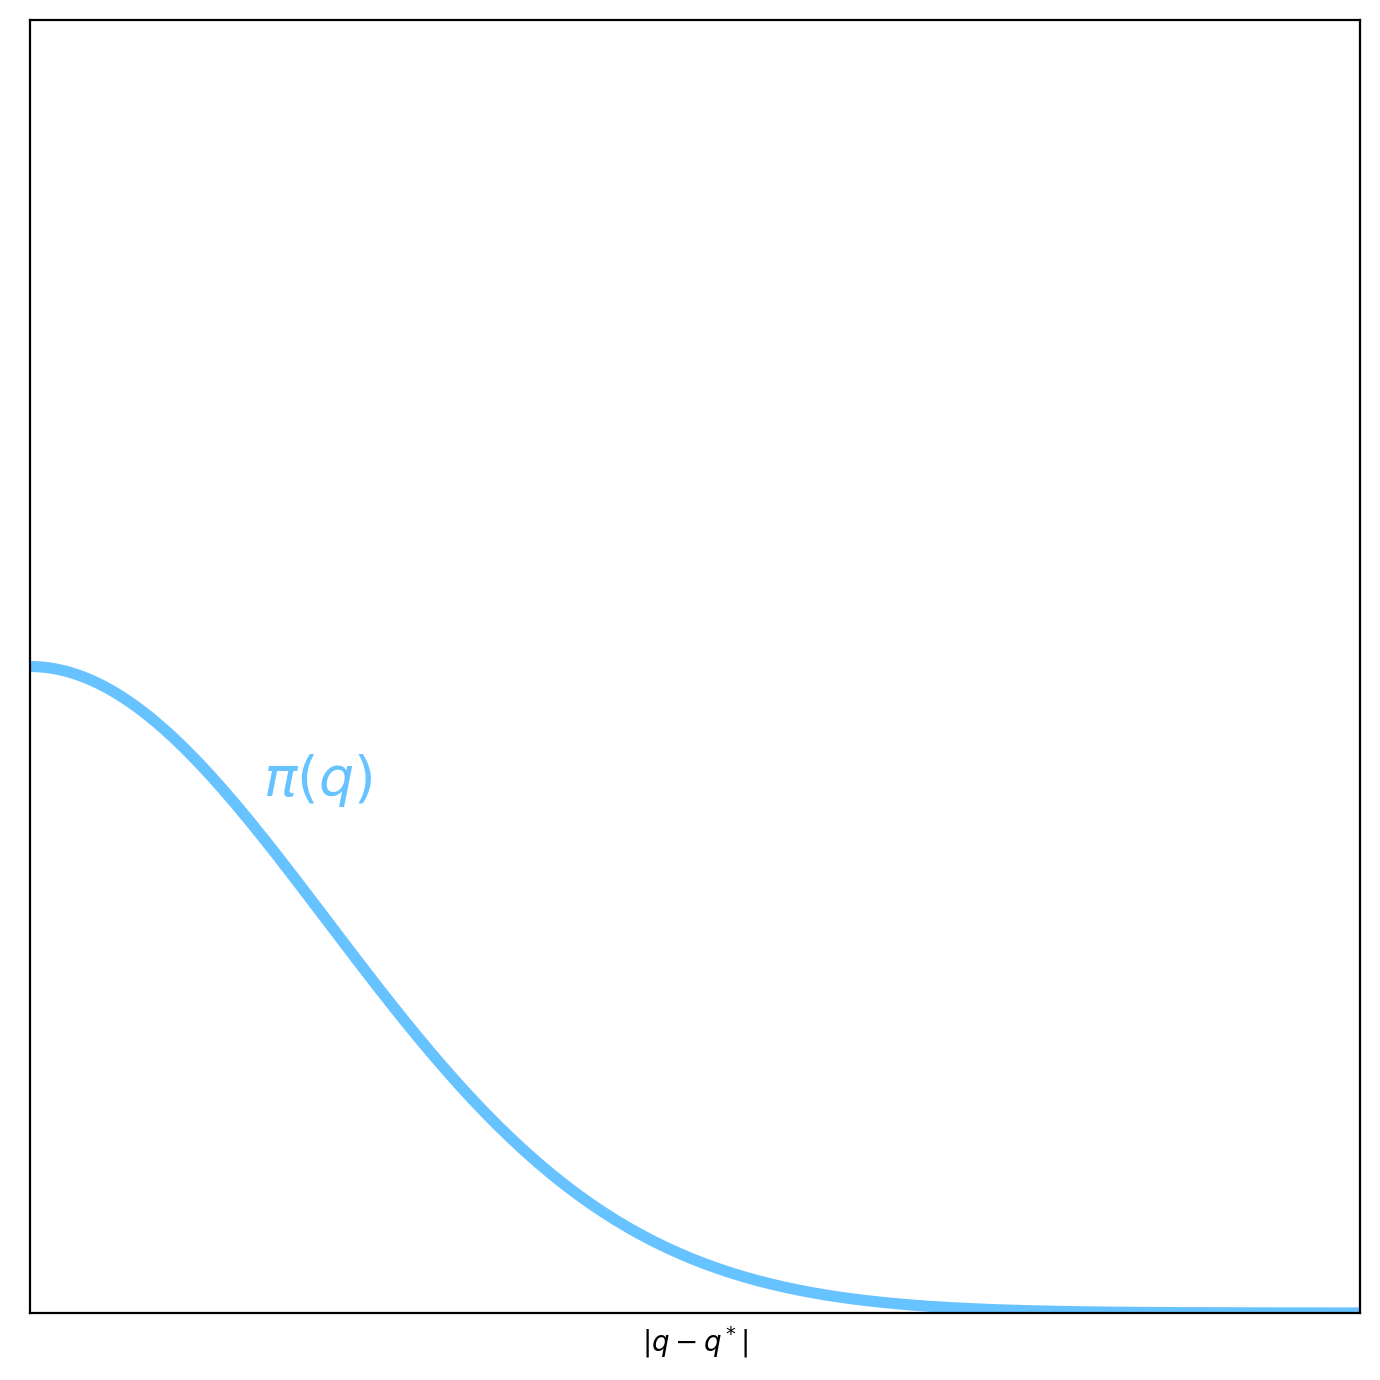

In [ ]:
from scipy.special import loggamma 
import matplotlib.patheffects as pe


fig, ax = plt.subplots(1,1, figsize=(7,7), tight_layout=True)
x = np.linspace(0,2,200)
ax.plot(x, np.exp(-0.5*x**2/0.2),c=MID,linewidth=4)
ax.text(0.35,0.8,r'$\pi(q)$', c=MID, fontsize=20)#,path_effects=[pe.withStroke(linewidth=.2, foreground='black')])


ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlabel(r'$|q-q^*$|')
plt.show()
fig.savefig('../markdown/img/com_distribution.png')

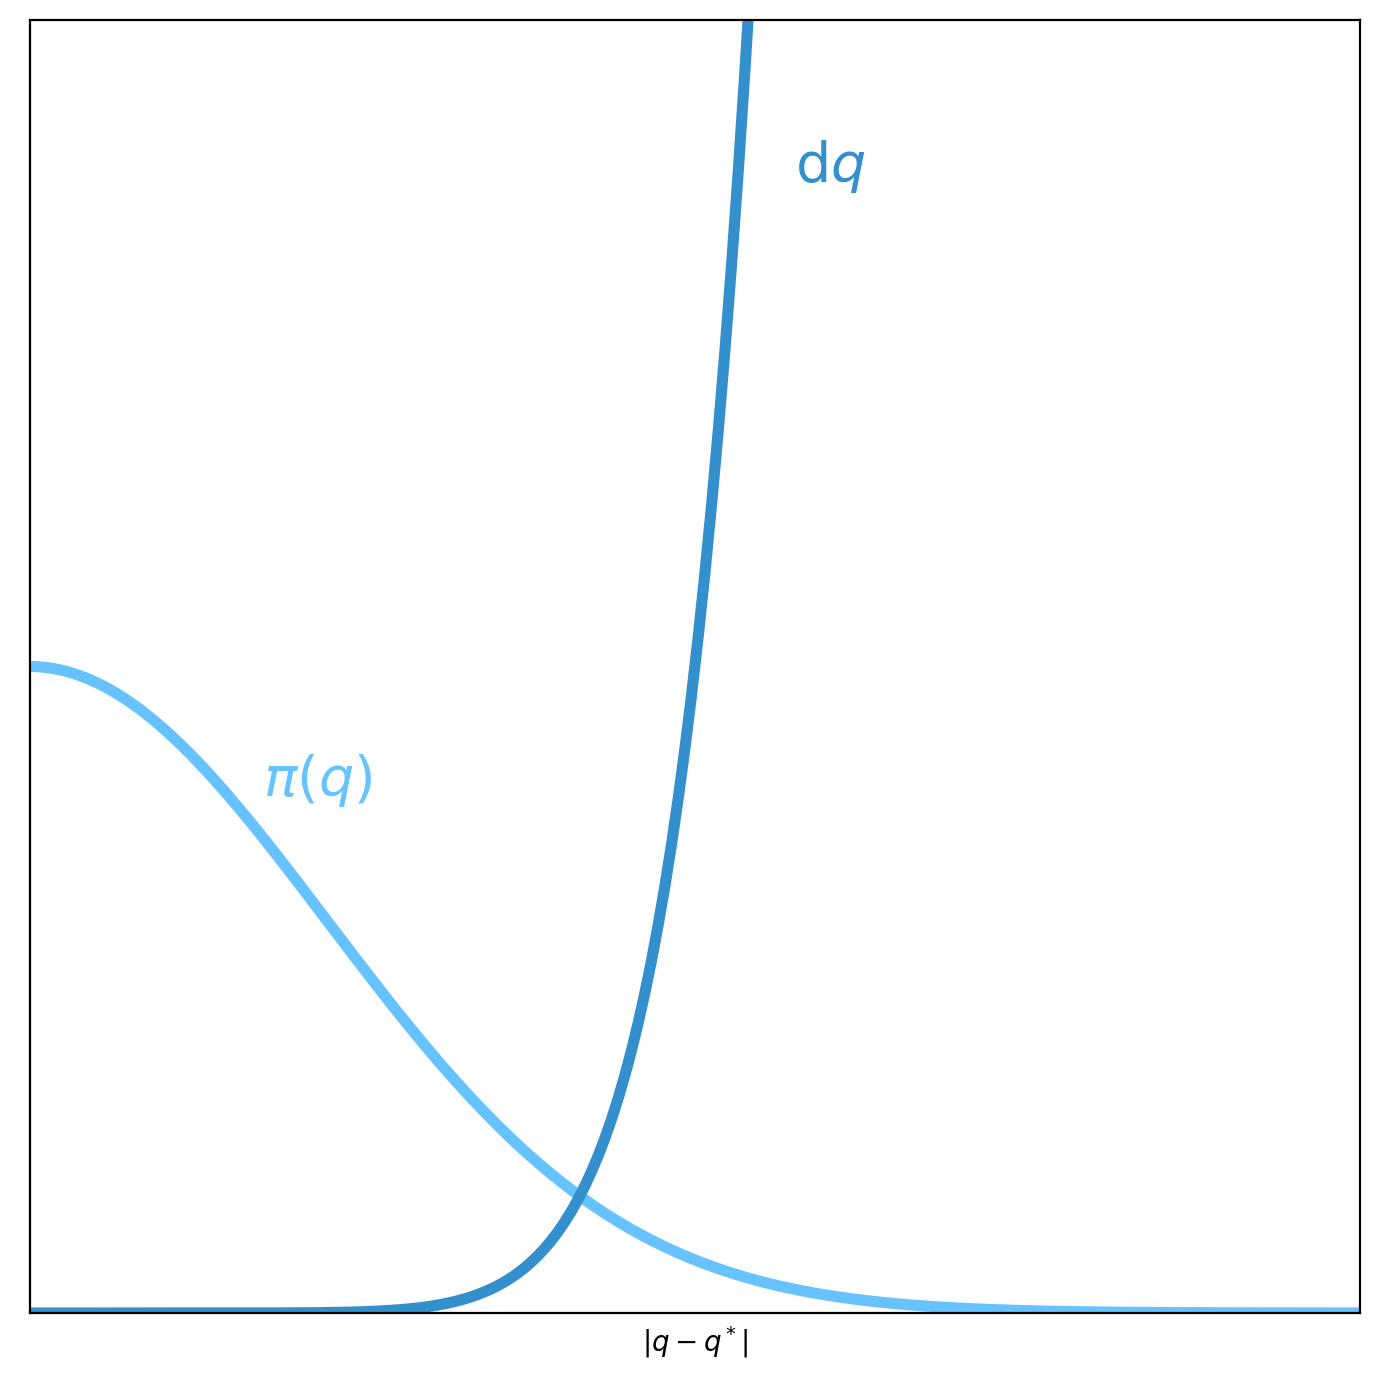

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7), tight_layout=True)
x = np.linspace(0,2,200)
ax.plot(x, np.exp(-0.5*x**2/0.2),c=MID,linewidth=4)
ax.text(0.35,0.8,r'$\pi(q)$', c=MID, fontsize=20)#,path_effects=[pe.withStroke(linewidth=.2, foreground='black')])

ax.plot(x, x**9,c=MID_HIGHLIGHT,linewidth=4)
ax.text(1.15,1.75,r'$\mathrm{d}q$', c=MID_HIGHLIGHT, fontsize=20)
fun = lambda x: np.exp(np.log(2.)-loggamma(4.5) - 4.5 * np.log(2.0 * 0.1) + (9) * np.log(x) - 0.5 * x * x / 0.1 )  


ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlabel(r'$|q-q^*$|')
plt.show()

fig.savefig('../markdown/img/com_volume.png')

/var/folders/j5/wr2j95x534x62nm4sfx97cbc0000gn/T/ipykernel_29187/457374451.py:8: RuntimeWarning: divide by zero encountered in log
  fun = lambda x: np.exp(np.log(2.)-loggamma(4.5) - 4.5 * np.log(2.0 * 0.1) + (9) * np.log(x) - 0.5 * x * x / 0.1 )


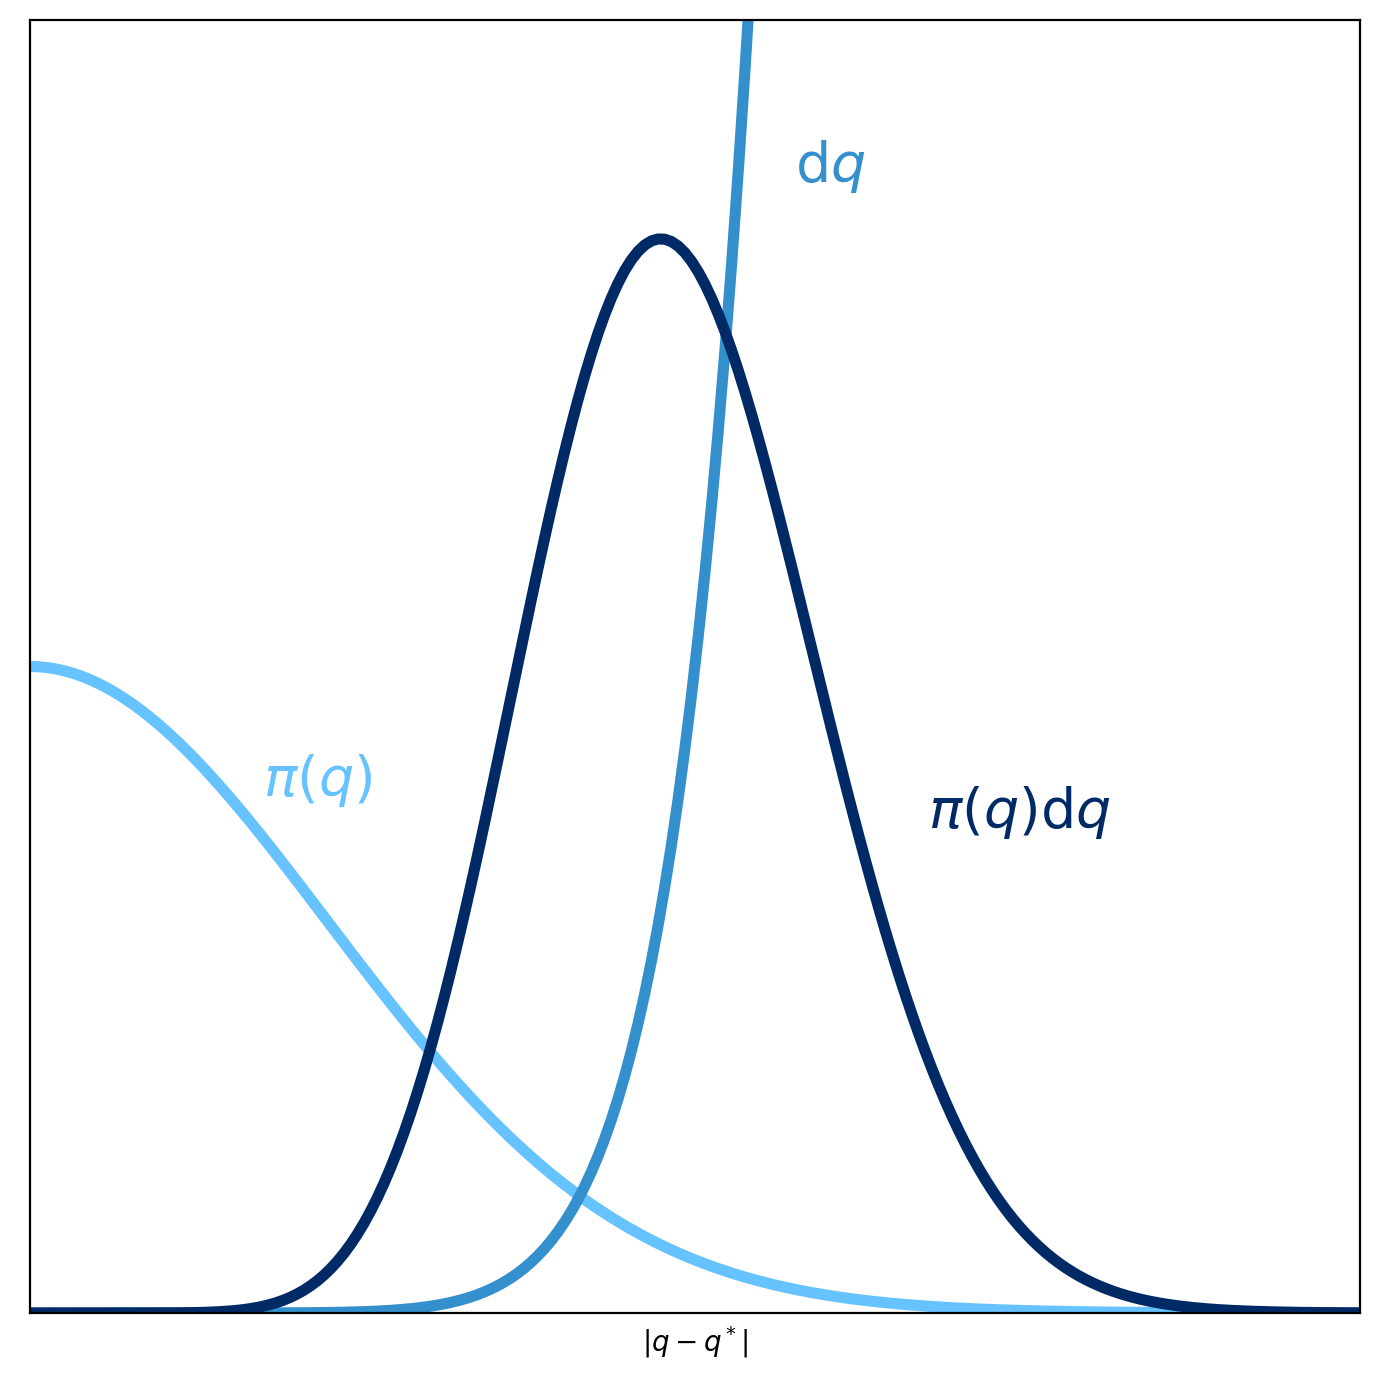

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7), tight_layout=True)
x = np.linspace(0,2,200)
ax.plot(x, np.exp(-0.5*x**2/0.2),c=MID,linewidth=4)
ax.text(0.35,0.8,r'$\pi(q)$', c=MID, fontsize=20)#,path_effects=[pe.withStroke(linewidth=.2, foreground='black')])

ax.plot(x, x**9,c=MID_HIGHLIGHT,linewidth=4)
ax.text(1.15,1.75,r'$\mathrm{d}q$', c=MID_HIGHLIGHT, fontsize=20)
fun = lambda x: np.exp(np.log(2.)-loggamma(4.5) - 4.5 * np.log(2.0 * 0.1) + (9) * np.log(x) - 0.5 * x * x / 0.1 )  
ax.plot(x, fun(x),c=DARK_HIGHLIGHT,linewidth=4)
ax.text(1.35,0.75,r'$\pi(q)\mathrm{d}q$', c=DARK_HIGHLIGHT, fontsize=20)

ax.set_ylim(0,2)
ax.set_xlim(0,2)
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlabel(r'$|q-q^*$|')
plt.show()
fig.savefig('../markdown/img/com_typical_set.png')

## But what about the volume?

$dq$ is also under the integral, and volume rises with dimension
<img src="img/box-1d.png" alt="drawing" width="150"/>
<img src="img/box-2d.png" alt="drawing" width="500"/>
<img src="img/box-3d.png" alt="drawing" width="700"/>
<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>

## Volume rises exponentially with dimension

<img src="img/conc_of_meas_anal_2.png" alt="drawing" width="400"/>


<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## It is the product that counts


<img src="img/conc_of_meas_anal_3.png" alt="drawing" width="400"/>


<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Typical set
What contributes the most to the expectation are the values from the typical set

<img src="img/conc_of_meas_anal_4.png" alt="drawing" width="400"/>


<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Concentration of measure

Typical set, is a "fuzzy surface" that is located progressively away from the mode with the rise of dimension.

<img src="img/typical_set.png" alt="drawing" width="500"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


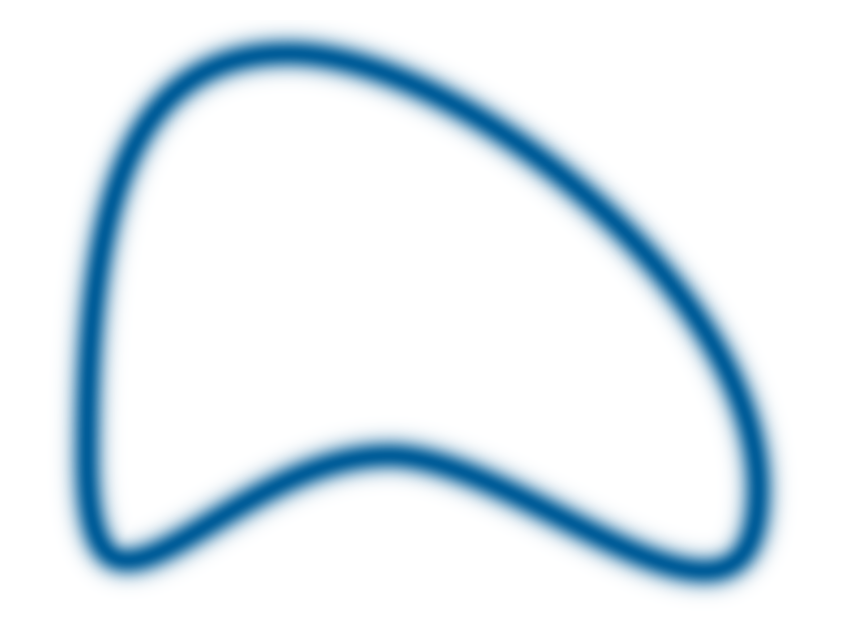

In [ ]:
input_file = 'typical_set.pdf'
pic_grid = convert_from_path('../tikz/'+input_file,dpi=300)
output_folder='../markdown/img/'
output_file=input_file.replace('.pdf','.png')
pic_grid[0].save(output_folder+output_file, 'PNG')
plt.imshow(pic_grid[0])
plt.axis('off')

plt.show()

## Typical set is where we should sample from

<img src="img/typical_set_samples.png" alt="drawing" width="500"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


In [ ]:
from svgpathtools import Path, Line, CubicBezier, wsvg

#(-10, -2) .. controls (-10, 5) and (-9, 10) .. (-4, 10)
                # (-10, -2) .. controls (-10, 5) and (-9, 10) .. (-4, 10)
                # .. controls (1, 10) and (10, 3) .. (10, -3)
                # .. controls (10, -9) and (3, -2) .. (-1, -2)
                # .. controls (-6, -2) and (-10, -9) .. (-10, -2);



bezier_curve1 = CubicBezier(start=(-10+-2j), control1=(-10+5j), control2=(-9+10j), end=(-4+10j))
bezier_curve2 = CubicBezier(start=(-4+10j), control1=(1+10j), control2=(10+3j), end=(10-3j))
bezier_curve3 = CubicBezier(start=(10-3j), control1=(10-9j), control2=(3-2j), end=(-1+-2j))
bezier_curve4 = CubicBezier(start=(-1+-2j), control1=(-6-2j), control2=(-10-9j), end=(-10-2j))


bezier_path = Path(bezier_curve1,bezier_curve2,bezier_curve3,bezier_curve4)

NUM_SAMPLES = 80

myPath = []
for i in range(NUM_SAMPLES):
    myPath.append(bezier_path.point(i/(float(NUM_SAMPLES)-1)))



In [ ]:
def convert_to_tikz_points(tuple):
    return '\\fill[color=dark] ({0:1.2f}, {1:1.2f}) circle (7pt);\n\\fill[color=light] ({0:1.2f}, {1:1.2f}) circle (5pt);\n'.format(tuple[0],tuple[1])


In [ ]:
np.random.seed(42)

with open('../tikz/ts_samples.tex', 'w') as f:
    for c in myPath:
        tuple = (c.real+np.random.normal(scale=0.3), c.imag+np.random.normal(scale=0.3))
        f.write(convert_to_tikz_points(tuple))




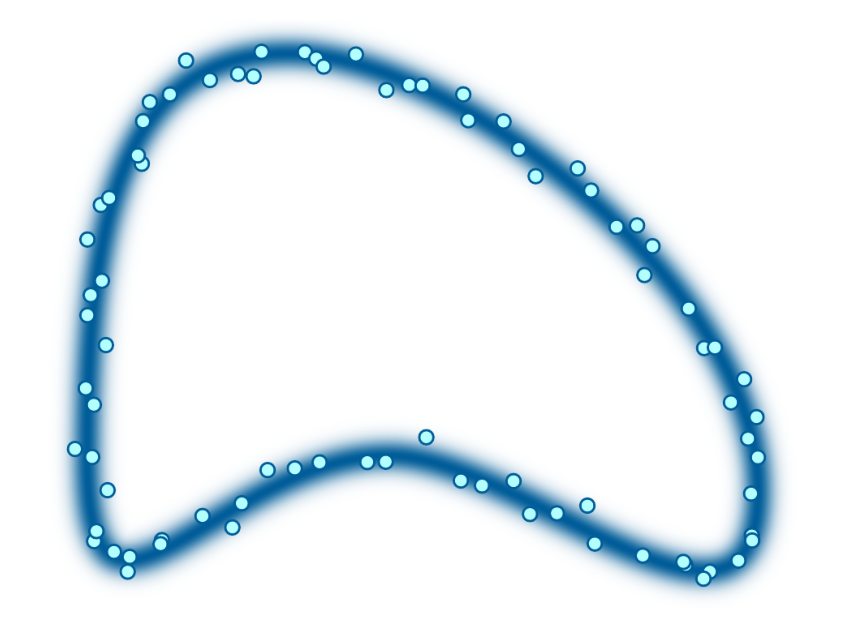

In [ ]:
input_file = 'typical_set_samples.pdf'
pic_grid = convert_from_path('../tikz/'+input_file,dpi=300)
output_folder='../markdown/img/'
output_file=input_file.replace('.pdf','.png')
pic_grid[0].save(output_folder+output_file, 'PNG')
plt.imshow(pic_grid[0])
plt.axis('off')

plt.show()

## Computational algorithms for probabilistic computing

- Point estimators
- Laplace approximation
- Variational approximation
- Monte Carlo estimators
- Markov Chain Monte Carlo 

## Modal estimators 
This approach searches for the maximal value of probability distribution, in order to obtain approximation of expected value

<img src="img/good_mode.png" alt="drawing" width="500"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


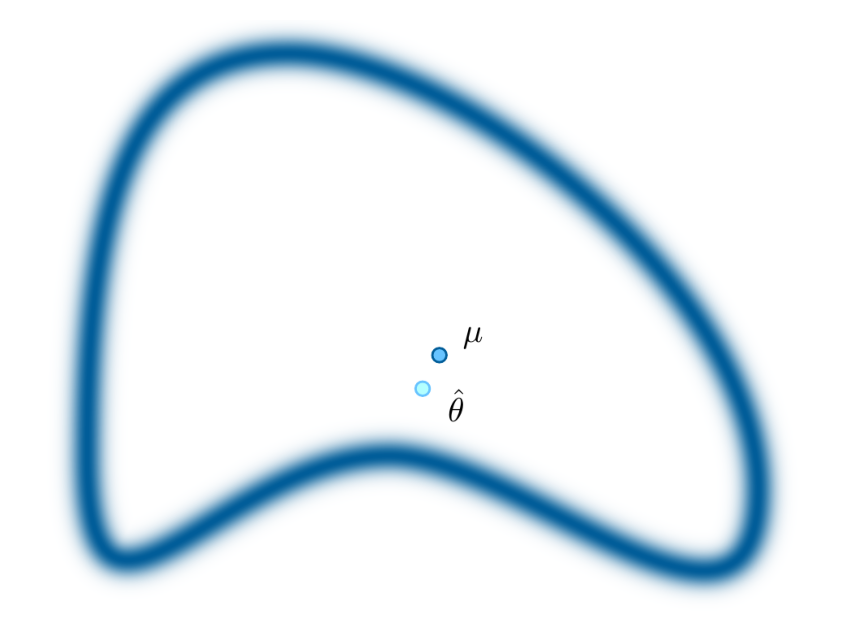

In [ ]:
input_file = 'typical_set_with_good_mode.pdf'
pic_grid = convert_from_path('../tikz/'+input_file,dpi=300)
output_folder='../markdown/img/'
output_file=input_file.replace('.pdf','.png')
pic_grid[0].save(output_folder+output_file, 'PNG')
plt.imshow(pic_grid[0])
plt.axis('off')

plt.show()

## Issues
- skewed distributions have maxima far from expectations
- problems with uncertainty quantisation

<img src="img/bad_mode.png" alt="drawing" width="500"/> 

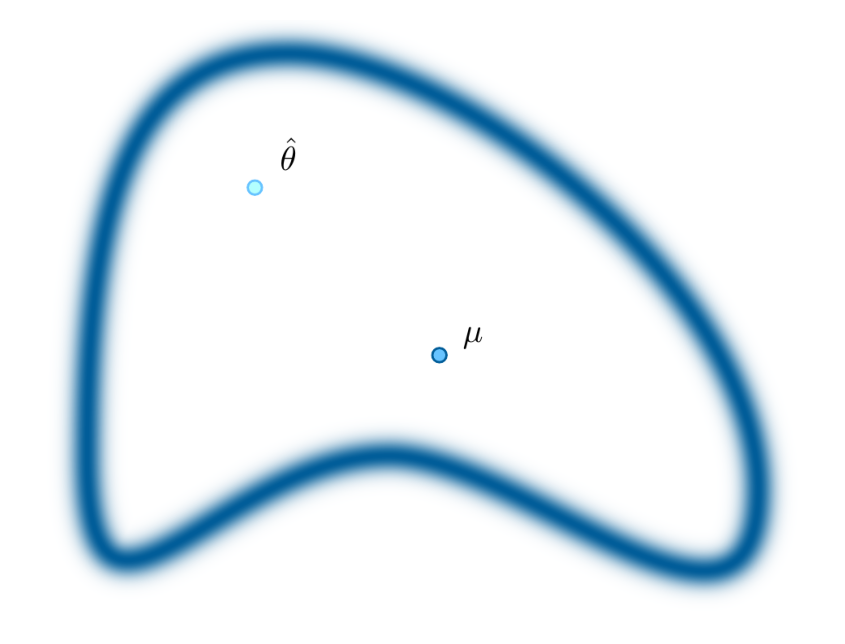

In [ ]:
input_file = 'typical_set_with_bad_mode.pdf'
pic_grid = convert_from_path('../tikz/'+input_file,dpi=300)
output_folder='../markdown/img/'
output_file=input_file.replace('.pdf','.png')
pic_grid[0].save(output_folder+output_file, 'PNG')
plt.imshow(pic_grid[0])
plt.axis('off')

plt.show()

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Laplace estimator

Main idea is to find the maximal value, and fit a Gaussian distribution with a mean in it, and covariance obtained by second order Taylor approximation.

Expectation values can then estimated with Gaussian integrals,
$$
\mathbb{E}_{\pi} \! \left[ f \right]
\approx 
\int_{Q} \mathrm{d} q \, \mathcal{N} \! \left( q \mid \mu, \Sigma \right) \,
f \! \left( q \right),
$$

## If distribution is relatively close to Gaussian, typical set is well approximated

<img src="img/laplace.png" alt="drawing" width="500"/> 

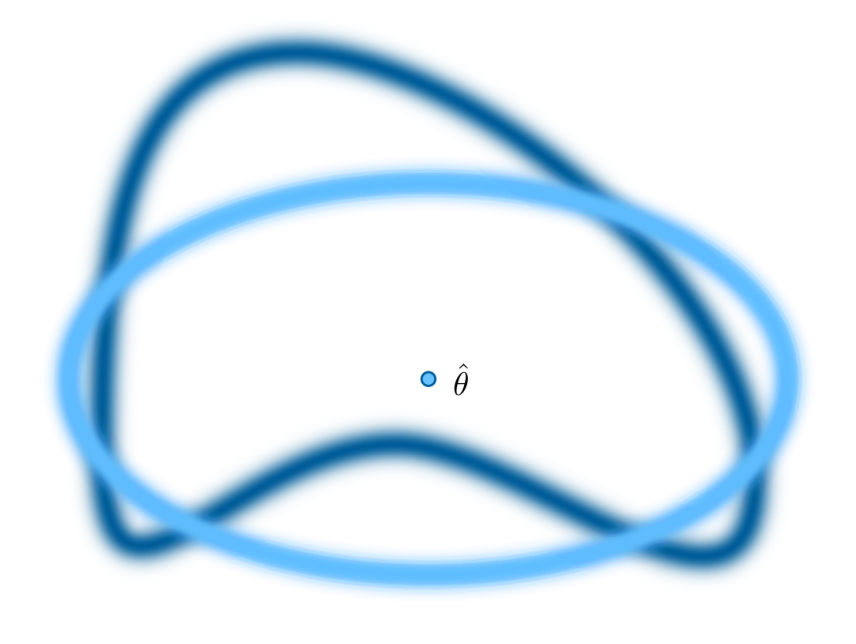

In [ ]:
input_file = 'typical_set_with_elipse_2.pdf'
pic_grid = convert_from_path('../tikz/'+input_file,dpi=300,use_pdftocairo=True)
output_folder='../markdown/img/'
output_file=input_file.replace('.pdf','.png')
pic_grid[0].save(output_folder+output_file, 'PNG')
plt.imshow(pic_grid[0])
plt.axis('off')
plt.show()

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Variational approximation

- The main idea is to approximate the posterior with functions, that can be easily sampled from (or their combination). 

- Such approximation is realized by minimization of a function called divergence, which measures how differetnt candidate and probability distribution are from one another.

- In practice it is done by minimizing certain bound on the divergence.

## Multimodality of variational approximation

It can happen, that significantly different candidates have similar divergences, that causes optimization problem to be multimodal



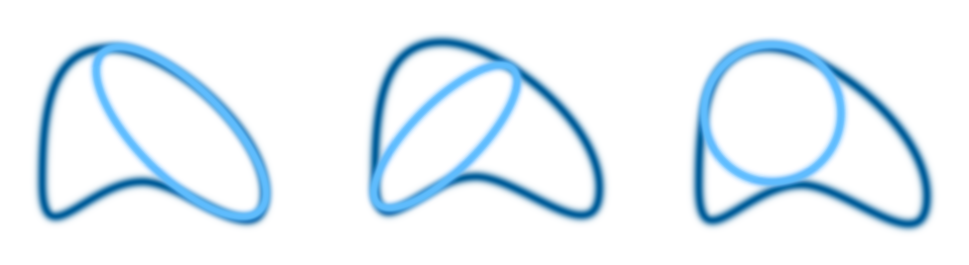

In [ ]:
fig,ax = plt.subplots(1,3)
for k in range(3):
    input_file = 'typical_set_with_bad_elipse_{}.pdf'.format(k+1)
    pic_grid = convert_from_path('../tikz/'+input_file,dpi=300,use_pdftocairo=True) 
    output_folder='../markdown/img/'
    output_file=input_file.replace('.pdf','.png')
    pic_grid[0].save(output_folder+output_file, 'PNG')
    ax[k].imshow(pic_grid[0])
    ax[k].set_axis_off()
plt.show()

<img src="img/degenerate_fits.png" alt="drawing" width="1000"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Over and under fitting of the typical set

<img src="img/overestimated_var.png" alt="drawing" width="500"/>
<img src="img/underestimated_var.png" alt="drawing" width="500"/>
<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>

## Monte Carlo sampling

<img src="img/typical_set_samples.png" alt="drawing" width="500"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Issues with Monte Carlo 

- It is easy to sample from known distributions, especially low dimensional or normal
- Complicated distributions are an issue
- Importance sampling is an option
    - Sample from something that you know (proposal distribution)
    - Correct with properly chosen weights
    - Strongly depends on quality of proposal

## Markov Chain Monte Carlo


<img src="img/typical_set_markov_chain.png" alt="drawing" width="500"/> 

<div style="text-align: right"> <span style="font-size:.3em;">Image &copy; <a href="https://betanalpha.github.io"> Michael Betancourt</a></span> </div>


## Extra reading

[Probabilistic Computation by Michael Betancourt](https://betanalpha.github.io/assets/case_studies/probabilistic_computation.html#1_representation_with_computational_taxation)